## 1. Importing Libraries and Data


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'C:\Users\kamil\Documents\6 Advanced Analytics & Dashboard Design\1'

In [8]:
df = pd.read_csv(os.path.join(path,'boat_data_cleaned.csv'), index_col = False)

In [9]:
df.shape

(6001, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6001 non-null   int64  
 1   Boat Type                    6001 non-null   object 
 2   Manufacturer                 6001 non-null   object 
 3   Type                         6001 non-null   object 
 4   Year Built                   6001 non-null   int64  
 5   Length                       6001 non-null   float64
 6   Width                        6001 non-null   float64
 7   Material                     6001 non-null   object 
 8   Number of views last 7 days  6001 non-null   int64  
 9   EUR_price                    6001 non-null   float64
 10  Country                      6001 non-null   object 
 11  City                         6001 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 562.7+ KB


In [7]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee


##  2. Correlation Matrix

In [10]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days',
       'EUR_price', 'Country', 'City'],
      dtype='object')

In [11]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [12]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee


In [13]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR_price', 'Country',
       'City'],
      dtype='object')

In [14]:
# creating subset excluding categorical variables
sub = df[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'EUR_price']]

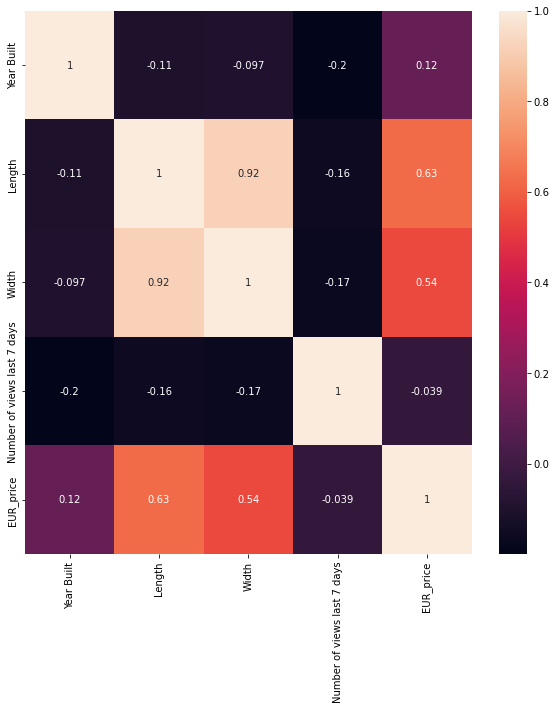

In [15]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The width and length of the boat are crucial parameters and have high correlations of 0.92. This makes sense since majority of boats size up in a proportion. 

When comparing the EU price with lenght, correlation coefficient is 0.63 and when comparing with width, correlation coeffitient is 0.54  

It is interesting to see that number of views and price have a negative correlation coefficient, which means that both variables move in opposite directions.



## 3. Scatterplot

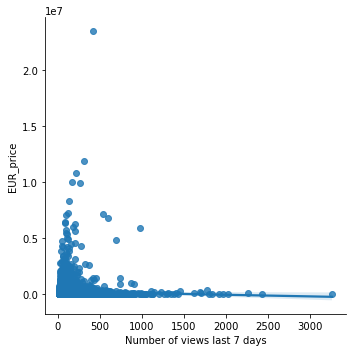

In [16]:
# Scatterplot for the "Number of views last 7 days" and the "EUR_price"
sns.lmplot(x='Number of views last 7 days', y ='EUR_price', data = df)

There is high concentration of views for listing prices under 500,000 euros, with the highest number of views for a particular listing being over 3000 views for a boat under 200,000 euros. It appears that most customers viewing boats have a budget of around 300,000 euros. Interestingly, there is a boat listed well above 20,000,000 euros that has had 500 views in the past 7 days. This may potentially due to the customers admiring the boat and being curious as to what the highest priced listing was.


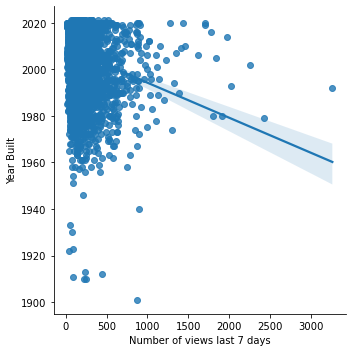

In [17]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
sns.lmplot(x='Number of views last 7 days', y ='Year Built', data = df)

There is a downward trend which means that people are potentially favoring older models. This could be potentially due to price and/or other factors as well. However, there is a concentration of boats manufacturered between the years 1960 and 2020.

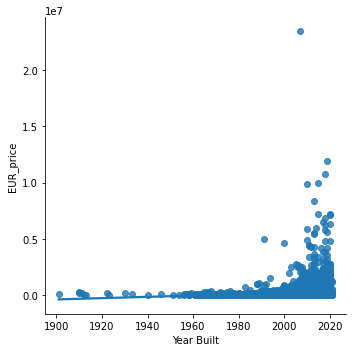

In [18]:
# Scatterplot for the "Year Built" and the "EUR_price"
sns.lmplot(x='Year Built', y ='EUR_price', data = df)

When we compare the year that the boat was build whit the price we can see upward trend. 

## 4. Pair plots

In [21]:
sub.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'EUR_price'],
      dtype='object')

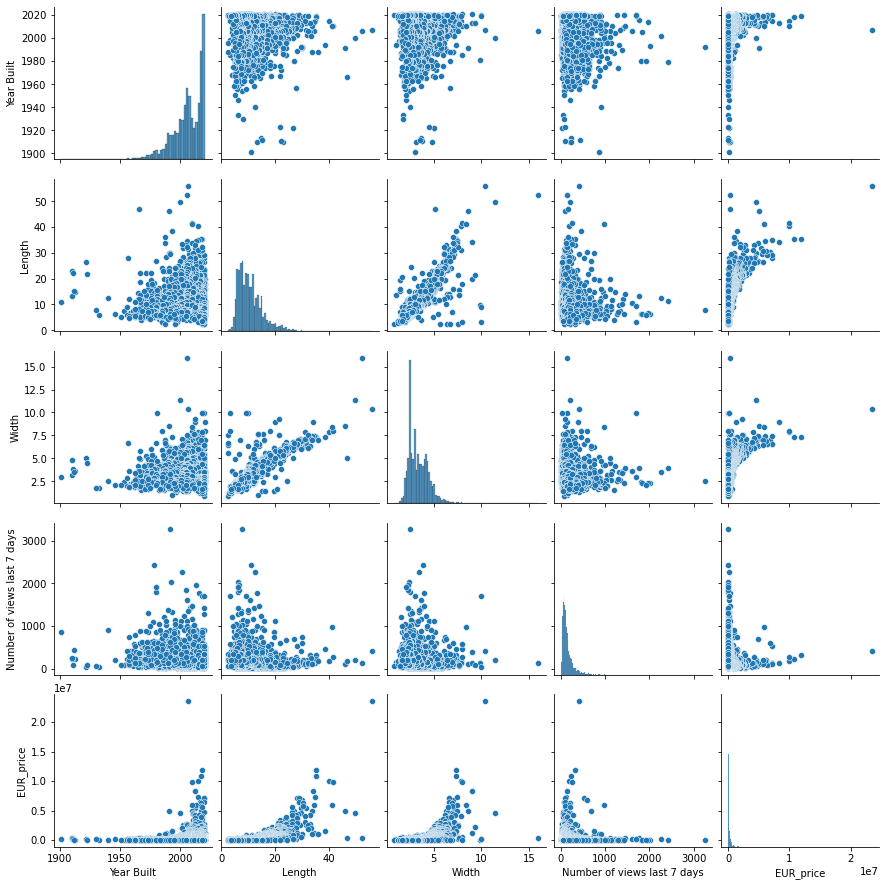

In [22]:
g = sns.pairplot(sub)

## 5. Categorical plots

<AxesSubplot:xlabel='EUR_price', ylabel='Count'>

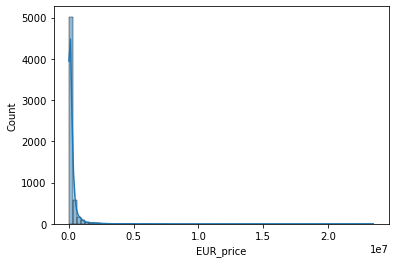

In [23]:
# creating a histogram of listing prices to visualize the distribution
sns.histplot(df['EUR_price'],bins=75,kde=True)

In [24]:
# creating listing price categories
df.loc[df['EUR_price'] <50000, 'Pricing Category'] = 'Low-priced'
df.loc[df['EUR_price'] >100000, 'Pricing Category'] = 'High-Priced'
df.loc[(df['EUR_price'] >=50000) & (df['EUR_price'] <=100000), 'Pricing Category'] = 'Mid-Priced'

In [25]:
df['Pricing Category'].value_counts(dropna=False)

High-Priced    2684
Low-priced     1837
Mid-Priced     1480
Name: Pricing Category, dtype: int64

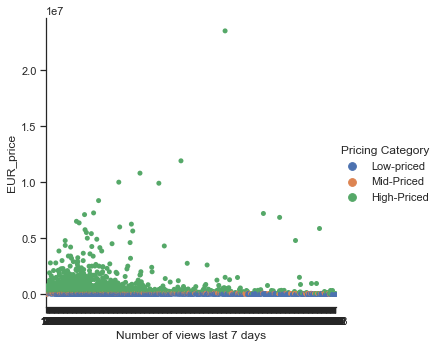

In [26]:
# creating a categorical plot crossing the number of views with related variables
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='EUR_price', hue = 'Pricing Category', data = df)

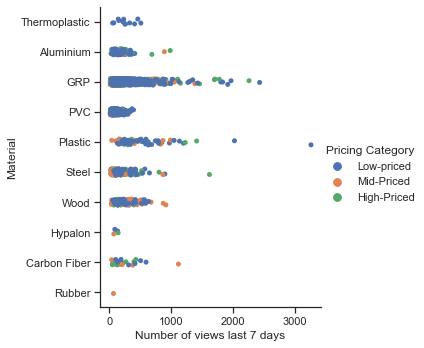

In [27]:
# creating a categorical plot crossing the number of views with boat material
sns.set(style='ticks')
g = sns.catplot(x='Number of views last 7 days', y='Material', hue = 'Pricing Category', data = df)

In [28]:
df['Material'].value_counts(dropna=False)

GRP              4223
PVC              1001
Steel             399
Wood              145
Aluminium         121
Plastic            68
Carbon Fiber       26
Thermoplastic      13
Hypalon             4
Rubber              1
Name: Material, dtype: int64

In [29]:
df['Country'].value_counts(dropna=False)

Germany                         1209
Italy                            918
Switzerland                      900
France                           870
Spain                            508
Croatia (Hrvatska)               472
Netherlands                      417
United Kingdom                   139
Portugal                         115
Austria                           66
Denmark                           63
Greece                            41
Turkey                            41
Belgium                           40
Malta                             25
Slovenia                          25
Poland                            23
Finland                           22
Sweden                            13
Montenegro                        12
Slovak Republic                    9
Lake Constance                     9
Lake Geneva                        6
Monaco                             6
Cyprus                             5
Hungary                            4
United States                      4
E

## 6. Questions and answers

- What are the characteristics of the most viewed boat listed in the last 7 days? 
Most viewed boats in the past week are listed above 100 000 Euros.
-  What is the location of the most viewed boat?
Germany has the most boats listed.
- What is the price of the most viewed boat?
 Boats listed above 100,000 euros are getting the most views and then boats between 50,000 and 100,000 euros are getting the least amount of views.
- Is there a common characteristic between the most viewed boats?
Older boats are getting the most views. Boats made out of GRP are most listed

##  7. Hypothesis 

If a boat listed kosts over 100,000 euroes, then it will generate web traffic and get more views.
If a boat listed is an older model, then it will generate web traffic and get more views.
If a boat listed is made out of GRP, then it will generate web traffic and get more views.

In [32]:
df.to_pickle(os.path.join(path,'boat_data_cleaned_pkl.csv'))